

# Project:  Airlines Delay and Cancellation Analysis

# By (Asmaa Aamer)



<a id='intro'></a>
## Introduction

### Dataset Description 
> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays.
The goal of this project is to summarize the data by time periods, carriers,airports and understand different factors causing the airline delays and cancellation.




### Asking Questions :
- What is the unique carrier that is cancelled most ?
- what is the most reason that make the cancellation happen ?
- Which month has more cancellation and what is the reason ?
- Which day has the most cancelled flights on ?
- Which day of month has the most flights cancelled ?
- What is the relationship between the Distance and Actual Elapsed Time and Air Time ?
- What is the relationship between the arrival delay and departure delay ?
- Is there a relationship between the Distance and the Arrival Delay ?
- What is the carrier with most delayed flights ?
- Is there a relationship between the Month, Day of month and Day of week with Arrival Delay ?
- What is the cancellation reasons for American Airlines and American Eagel Airlines ?
- What is the cancellation for American Airlines and American Eagel Airlines per month?
- Does the Distance affect the Arrival Delay for the Carrier ?

In [1]:
## Import all necessary packages:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# display all columns
pd.set_option('display.max_columns', 500)

# use style 
plt.style.use('seaborn-dark')

####  the distrbution of distance with airlines that are cancelled


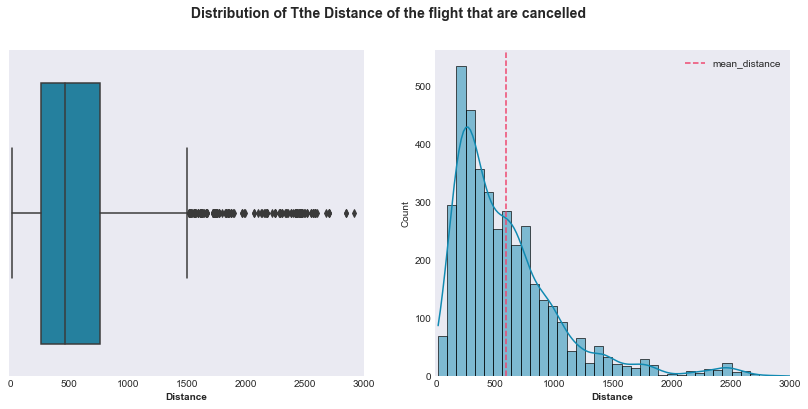

In [26]:

# create subplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[14, 6])

# box plot 
a = sns.boxplot(data = airline_cancelled , x = 'distance', color = blue, ax = ax1)
a.set_xlabel(xlabel= 'Distance', size = 10, weight = 'bold')
a.set(xlim=(-10, 3000))

# histogram
a = sns.histplot(data = airline_cancelled, x = 'distance', kde = True, bins= 50, color = blue, ax = ax2)
a.set_xlabel(xlabel = 'Distance' , size = 10, weight = 'bold')
a.set(xlim=(-10, 3000))

# draw mean distance line in the histogram plot
mean2 = airline_cancelled.distance.mean()
plt.axvline(x = mean2, color = red, linestyle = '--', label = 'mean_distance')

# add title
plt.suptitle(" Distribution of Tthe Distance of the flight that are cancelled", weight='bold', size=14)

plt.legend()
plt.show()

- The histogram is skewed to the right with mean distance around 500 miles.
-  More flights cancelled are less than 500 miles which means maybe the short airlines are likely to cancelled more than the long airlines. 


#### What is the unique carrier that is cancelled most ?

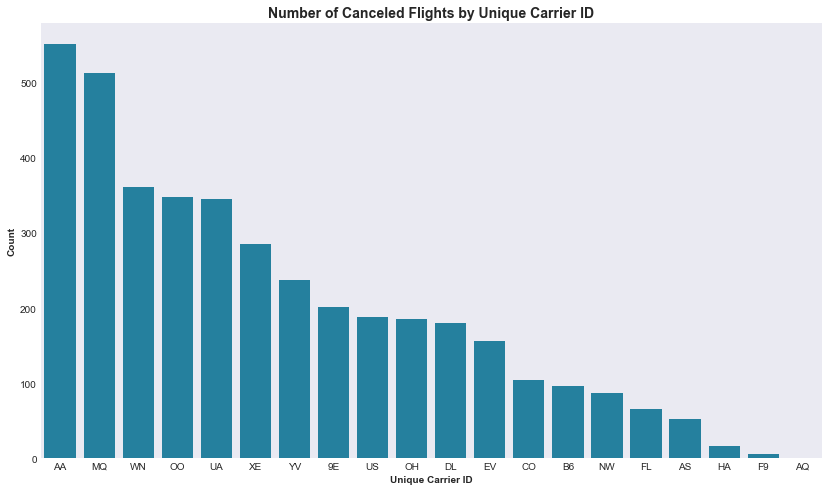

In [30]:
plt.figure(figsize = (14,8))

order =  airline_cancelled.unique_carrier.value_counts().index
sns.countplot(data = airline_cancelled , x = 'unique_carrier', order = order , color = blue)

plt.xlabel('Unique Carrier ID', fontsize = 10, weight = "bold")
plt.ylabel('Count', fontsize = 10, weight = "bold")
plt.title('Number of Canceled Flights by Unique Carrier ID', fontsize = 14, weight = "bold")

plt.show()

> The most cancelled flights goes to American Eagel Airlines Inc. and American Airlines Inc. with more than 17k cancelled flights.

### lets see what is the most reason that make the cancellation happen ?

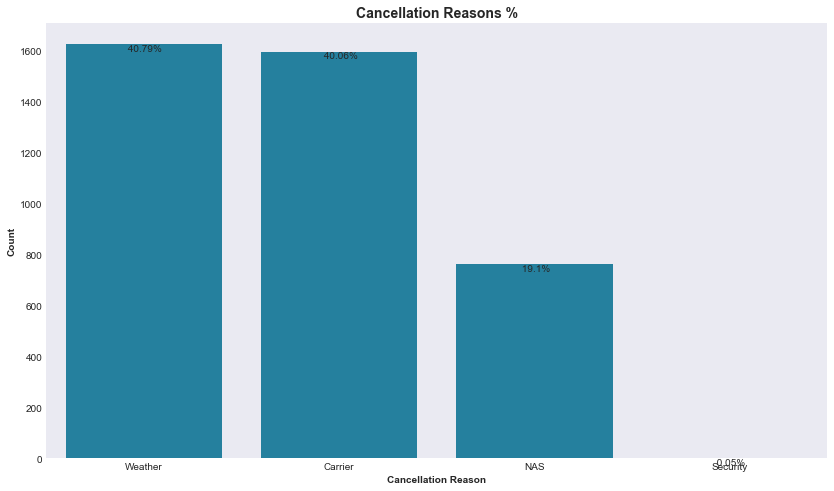

In [34]:
plt.figure(figsize=[14, 8])

# Plot
order = airline_cancelled['cancellation_code'].value_counts().index
g = sns.countplot(data=airline_cancelled, x='cancellation_code', color=blue, order=order)

# writing the ration over the bars 
for bar in range(airline_cancelled['cancellation_code'].value_counts().shape[0]):
    count = airline_cancelled['cancellation_code'].value_counts()[bar]
    pct = (airline_cancelled['cancellation_code'].value_counts()[bar]/\
    airline_cancelled['cancellation_code'].shape[0])
    pct = (round(pct, 5)*100).round(2)
    plt.text(x=bar, y=count, s= f" {pct}%", va='top', ha='center', fontsize = 10)

    
# rename the columns
g.set_xticklabels(['Weather', 'Carrier', 'NAS', 'Security'])

# axes labels
plt.xlabel('Cancellation Reason', fontsize = 10, weight = "bold")
plt.ylabel('Count', fontsize = 10, weight = "bold")

# title
plt.title('Cancellation Reasons %', weight='bold', size=14)

plt.show()

> The most two reasons that affect the cancellation process are **Weather and Carrier** and then the National Air System.
And the security dont have affect on the cancellation process


### Which  month  has more cancellation and what is the reason ?

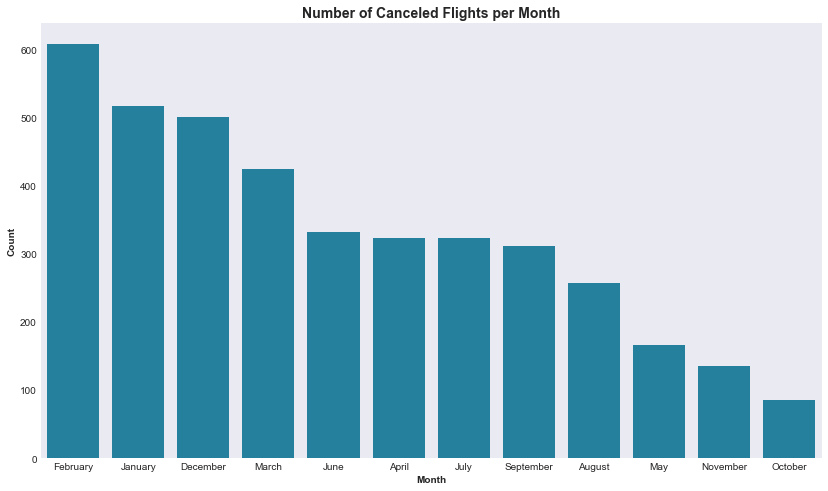

In [35]:
plt.figure(figsize = (14,8))

# Plot
order = airline_cancelled['month_name'].value_counts().index
g = sns.countplot(data=airline_cancelled, x = 'month_name', color=blue, order=order)

# axes labels and title
plt.xlabel('Month', fontsize = 10, weight = "bold")
plt.ylabel('Count', fontsize = 10, weight = "bold")
plt.title('Number of Canceled Flights per Month', fontsize = 14, weight = "bold")

plt.show()

> The most cancelled flights are in **February**, **December**, **January** and **March** respectively. and maybe because of the bad weather in these months.

### Which day has the most cancelled flights on ?

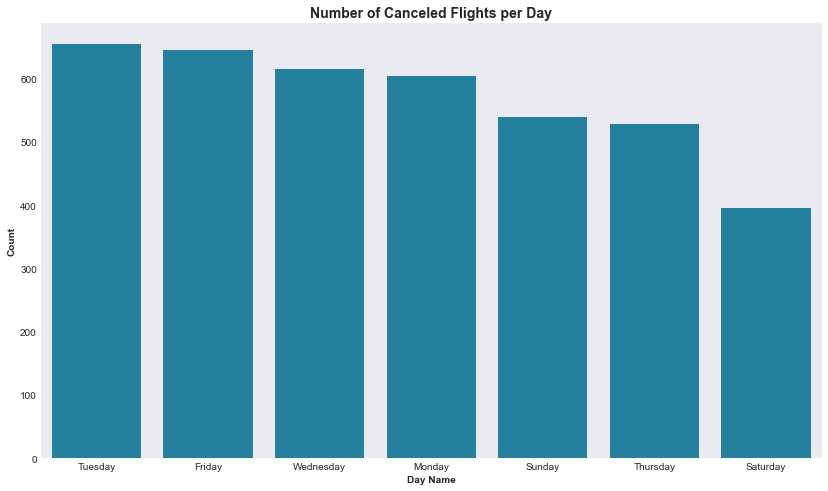

In [36]:
plt.figure(figsize = (14,8))

# Plot
order = airline_cancelled.day_name.value_counts().index
g = sns.countplot(data=airline_cancelled, x = 'day_name', color=blue, order=order)

# axes labels and title
plt.xlabel('Day Name', fontsize = 10, weight = "bold")
plt.ylabel('Count', fontsize = 10, weight = "bold")
plt.title('Number of Canceled Flights per Day', fontsize = 14, weight = "bold")

plt.show()

> The most flights cancelled happen in Friday and Tuesday.

### Which day of month has the most flights cancelled ?

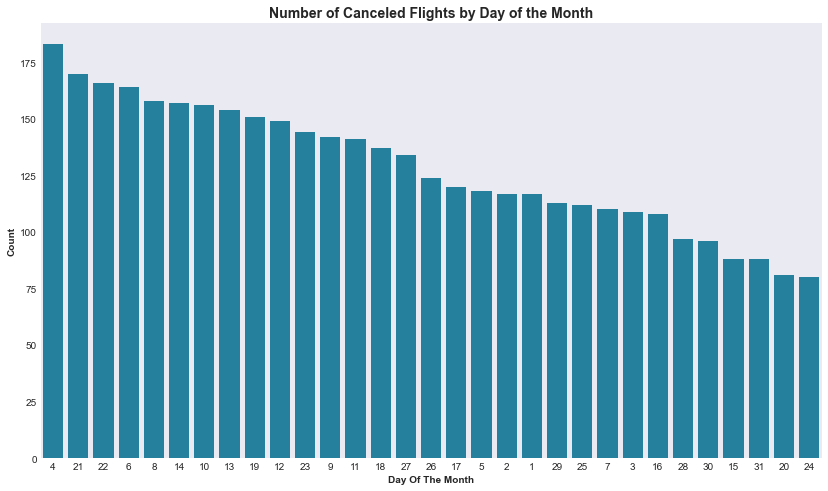

In [37]:
# DayofMonth
plt.figure(figsize=[14, 8])

# get order
order = airline_cancelled['dayofmonth'].value_counts().index

# barchart
sns.countplot(data=airline_cancelled, x='dayofmonth', order=order, color = blue)

# axes labels and title
plt.xlabel('Day Of The Month', fontsize = 10, weight = "bold")
plt.ylabel('Count', fontsize = 10, weight = "bold")
plt.title('Number of Canceled Flights by Day of the Month', fontsize = 14, weight = "bold")

plt.show()

> Most cancellation happen in the fourth and sixth of the month.

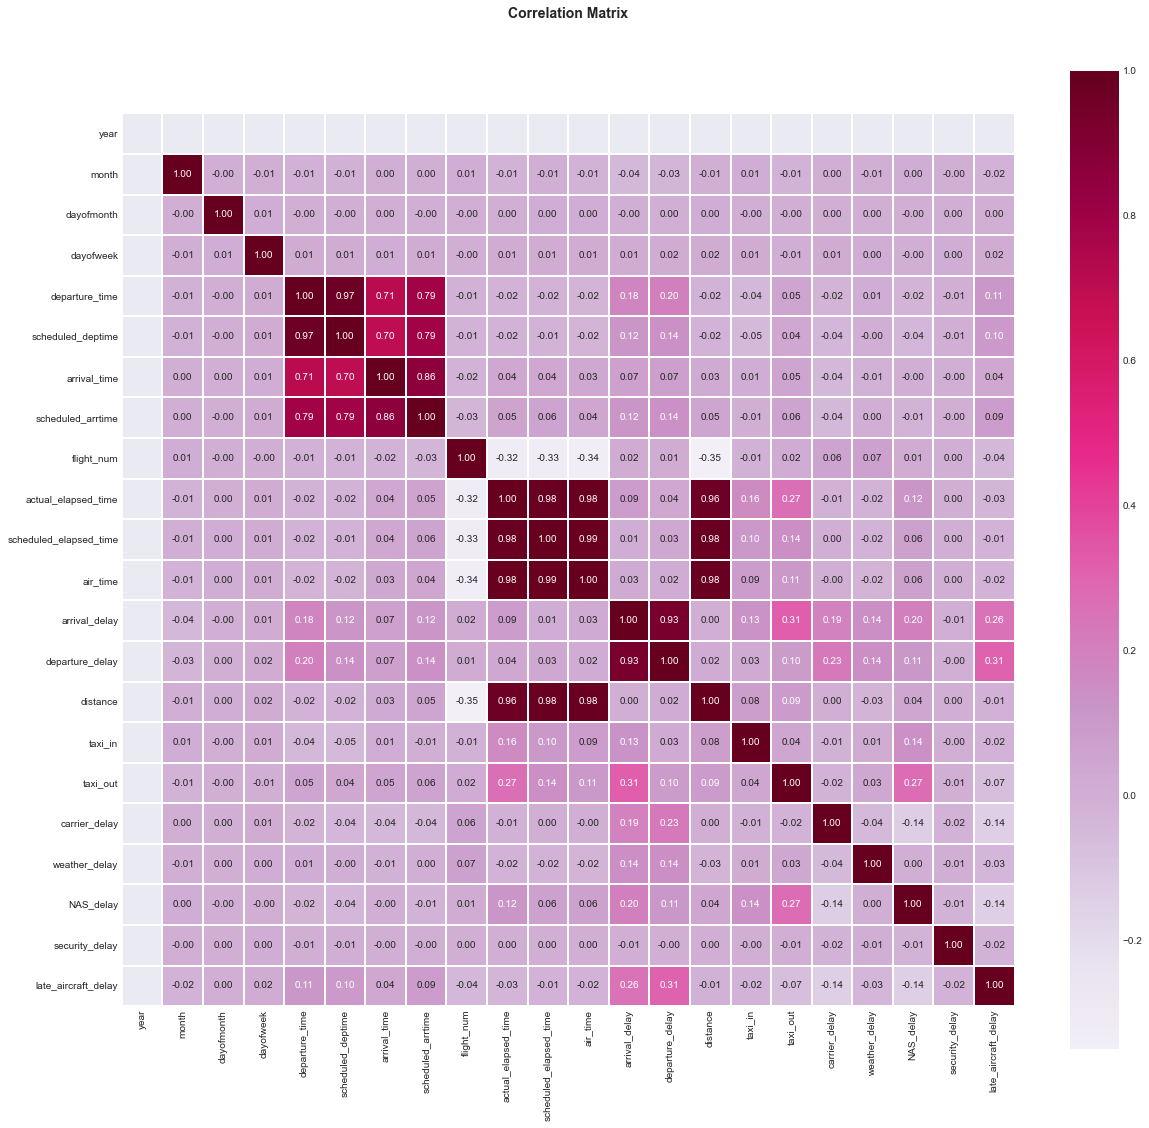

In [38]:
# correlation matrix

plt.figure(figsize=(20, 18))

sns.heatmap(airline_notcancelled.corr(), square=True, annot=True, fmt='.2f', cmap= 'PuRd', center=.3, linewidth=1, annot_kws={'fontsize': 10});

plt.title("Correlation Matrix", size=14, weight="bold", y = 1.1)

plt.show()

- `Distance` is highly correlated with `actual elapased time 96%` , `scheduled elapsed time 98%` and `air time 98%` and this makes a huge sense because the more the distance is the more the time you will spend in the air. 

- `Arrival delay` is highly correlated with the `Departure delay 93%`, and this also makes sense because the flights that arrived delay most likely would departure delay.

### What is the relationship between the Distance  and Actual Elapsed Time and Air Time ?

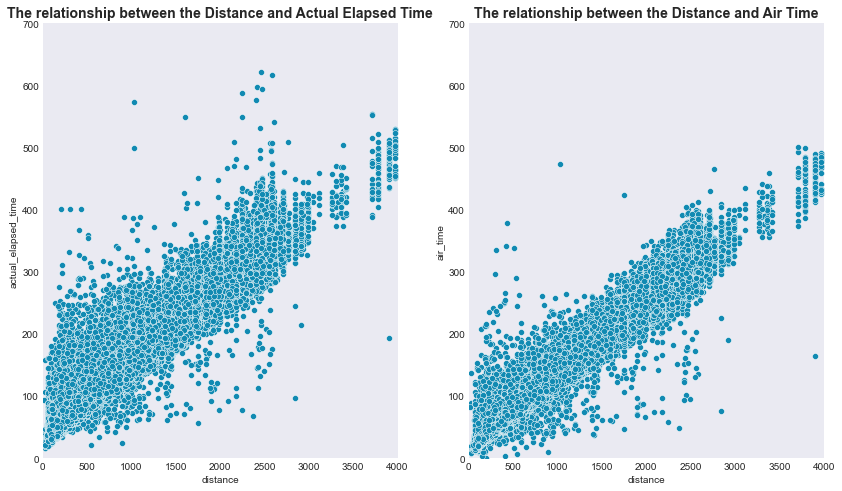

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# plot 1

ax1.set_title('The relationship between the Distance and Actual Elapsed Time', fontsize= 14, weight = 'bold')
sns.scatterplot(data=airline_samp, x='distance', y='actual_elapsed_time', color=blue, ax =ax1 )
ax1.set_xlim(0,4000)
ax1.set_ylim(0,700)

# plot 2

ax2.set_title('The relationship between the Distance and Air Time', fontsize= 14, weight = 'bold')
sns.scatterplot(data=airline_samp, x='distance', y='air_time', color=blue, ax =ax2)
ax2.set_xlim(0,4000)
ax2.set_ylim(0,700)


plt.show()

- There is a `Positive correlation` which means if the distance increases both the actual elapsed time and air time will increase. 


### What is the relationship between the arrival delay and departure delay ?

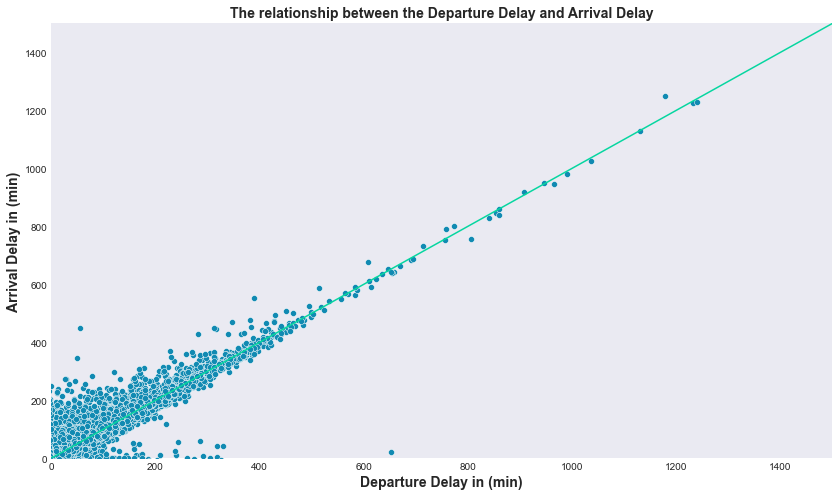

In [40]:
plt.figure(figsize=(14,8))

# plotting the scatter plot
g = sns.scatterplot(data=airline_samp, x='departure_delay', y='arrival_delay', color=blue)

# add the identity line, so we need to know the max scores of all scores:
line = max(max(df['departure_delay']) , max(df['arrival_delay']))
plt.plot([0,line], [0,line], color = green)

g.set_xlim(0,1500)
g.set_ylim(0,1500)

#axes labels and title
plt.xlabel('Departure Delay in (min)',fontsize = 14, weight = "bold")
plt.ylabel('Arrival Delay in (min)', fontsize = 14, weight = "bold")
plt.title('The relationship between the Departure Delay and Arrival Delay', fontsize= 14, weight = 'bold')

plt.show()

> There is a positive correlation, if the flight going off late absolutely it would arrive late.

### Is there a relationship between the Distance and the Arrival Delay ?

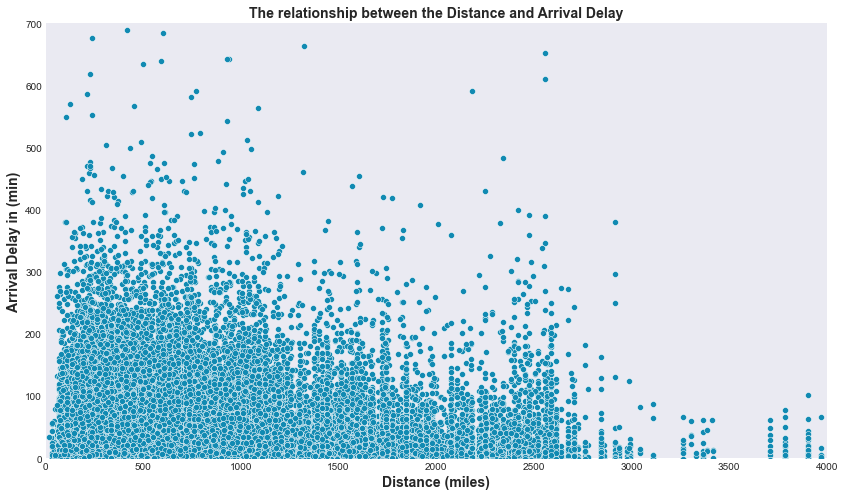

In [41]:
plt.figure(figsize=(14,8))

# plotting the scatter plot

g = sns.scatterplot(data=airline_samp, x='distance', y='arrival_delay', color=blue)


g.set_xlim(0,4000)
g.set_ylim(0,700)

#axes labels and title
plt.xlabel('Distance (miles)',fontsize = 14, weight = "bold")
plt.ylabel('Arrival Delay in (min)', fontsize = 14, weight = "bold")
plt.title('The relationship between the Distance and Arrival Delay', fontsize= 14, weight = 'bold')

plt.show()

> The flights that has short distance is more likely to delay more than the long distance.

### What is the carrier with most delayed flights ?

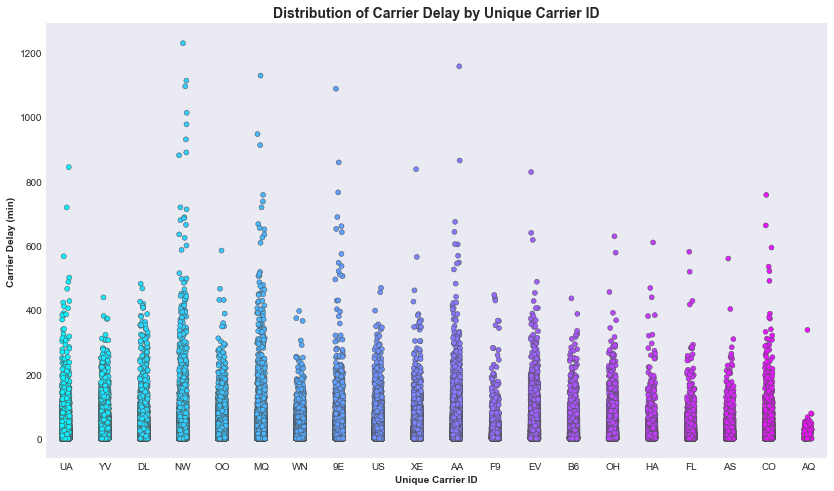

In [43]:
plt.figure(figsize=[14, 8])
# plot
sns.stripplot(data=airline_notcancelled, x='unique_carrier', y='carrier_delay',
              dodge=True, linewidth=0.5, palette='cool');

# title, lables & legend
plt.title("Distribution of Carrier Delay by Unique Carrier ID", fontsize = 14, weight = "bold")
plt.ylabel('Carrier Delay (min)', fontsize = 10, weight = "bold")
plt.xlabel('Unique Carrier ID', fontsize = 10, weight = "bold")

plt.show()

> `Northwest Airlines` has the most delayed flights followed by `American Eagel Airlines` and `American Airlines` 

### Is there a relationship between the Month, Day of month and Day of week  with Arrival Delay ?

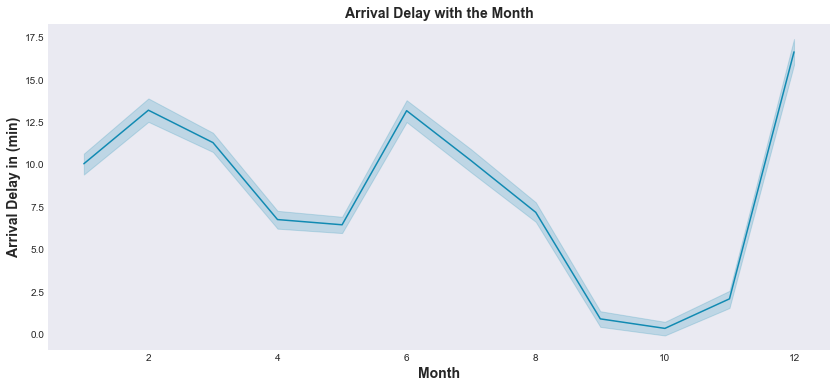

In [45]:
plt.figure(figsize=(14,6))

sns.lineplot(data=airline_notcancelled, x= 'month', y='arrival_delay',color = blue )

# the labels and title
plt.xlabel('Month', fontsize= 14, weight = 'bold')
plt.ylabel('Arrival Delay in (min)', fontsize= 14, weight = 'bold')
plt.title('Arrival Delay with the Month', fontsize= 14, weight = 'bold')

plt.show()

- From December to March there is high arrival delay maybe because of the bad weather these months.
- June is  too high . 
- But from september to November the delay is too small.

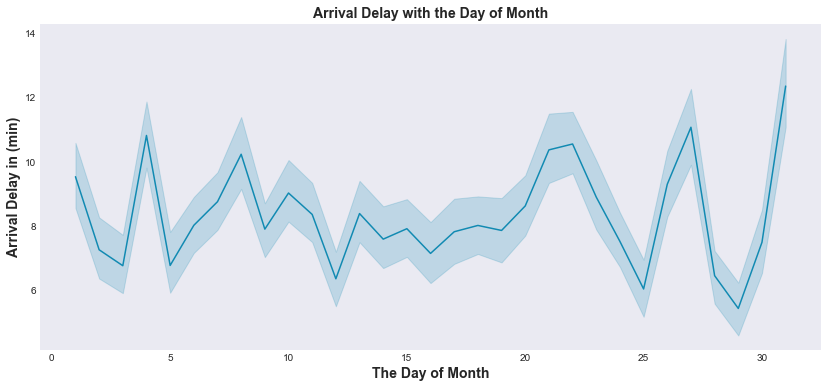

In [46]:
plt.figure(figsize=(14,6))

sns.lineplot(data=airline_notcancelled, x= 'dayofmonth', y='arrival_delay',color = blue )

# the labels and title
plt.xlabel('The Day of Month', fontsize= 14, weight = 'bold')
plt.ylabel('Arrival Delay in (min)', fontsize= 14, weight = 'bold')
plt.title('Arrival Delay with the Day of Month',  fontsize= 14, weight = 'bold')

plt.show()

> I see the ups and downs with all the days of the month , so there is not a relationship here.

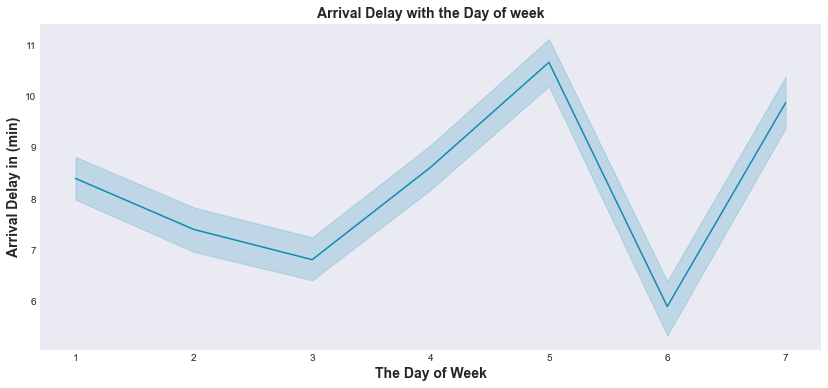

In [47]:
plt.figure(figsize=(14,6))
 
sns.lineplot(data=airline_notcancelled, x= 'dayofweek', y='arrival_delay',color = blue)

# the labels and title
plt.xlabel('The Day of Week', fontsize= 14, weight = 'bold')
plt.ylabel('Arrival Delay in (min)', fontsize= 14, weight = 'bold')
plt.title('Arrival Delay with the Day of week' ,fontsize= 14, weight = 'bold')

plt.show()

> The more arrival delay mostly happens from wednesday to friday, so i suggest to flight on weekends.

### What is the cancellation reasons for American Airlines and American Eagel Airlines ?

In [48]:
# make subset for the cancelletion flights

subset = airline_cancelled.query('(unique_carrier == "AA") | (unique_carrier == "MQ")')

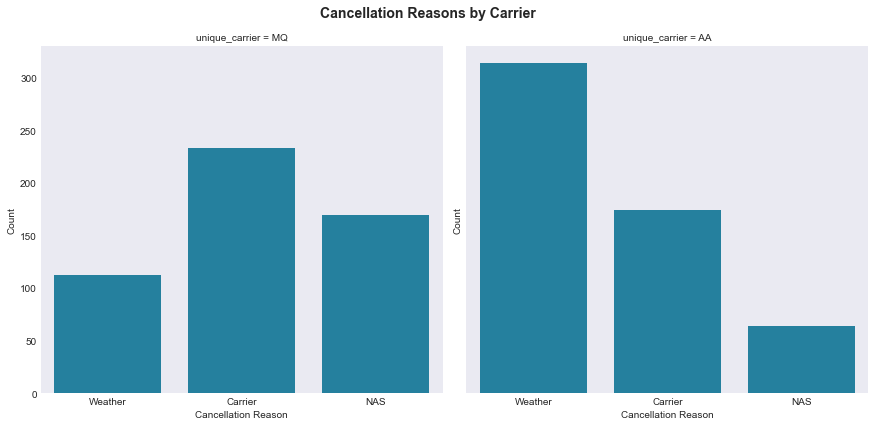

In [49]:
# getting order

order = subset['cancellation_code'].value_counts().index

# plotting

g = sns.FacetGrid(data=subset, col='unique_carrier', col_wrap=5, height=6)
g.map(sns.countplot, 'cancellation_code', order= order)

# rename the columns
#The Cancellation Code : reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
g.set_xticklabels(['Weather', 'Carrier', 'NAS'])



# axis label and title
g.set(xlabel='Cancellation Reason', ylabel='Count')
plt.suptitle('Cancellation Reasons by Carrier', fontsize = 14, weight = "bold", x=0.20)

plt.tight_layout();
plt.show()

- From above I figured out that `American Airlines`  and `American Eagel Airlines` are the most ones who cancelled flights. 
- The reasons for th AA is because of the `carrier` and then the `wheather`.
- For MQ the `weather` is the most and the `NAS` next.

### What is the cancellation for American Airlines and American Eagel Airlines  per month?

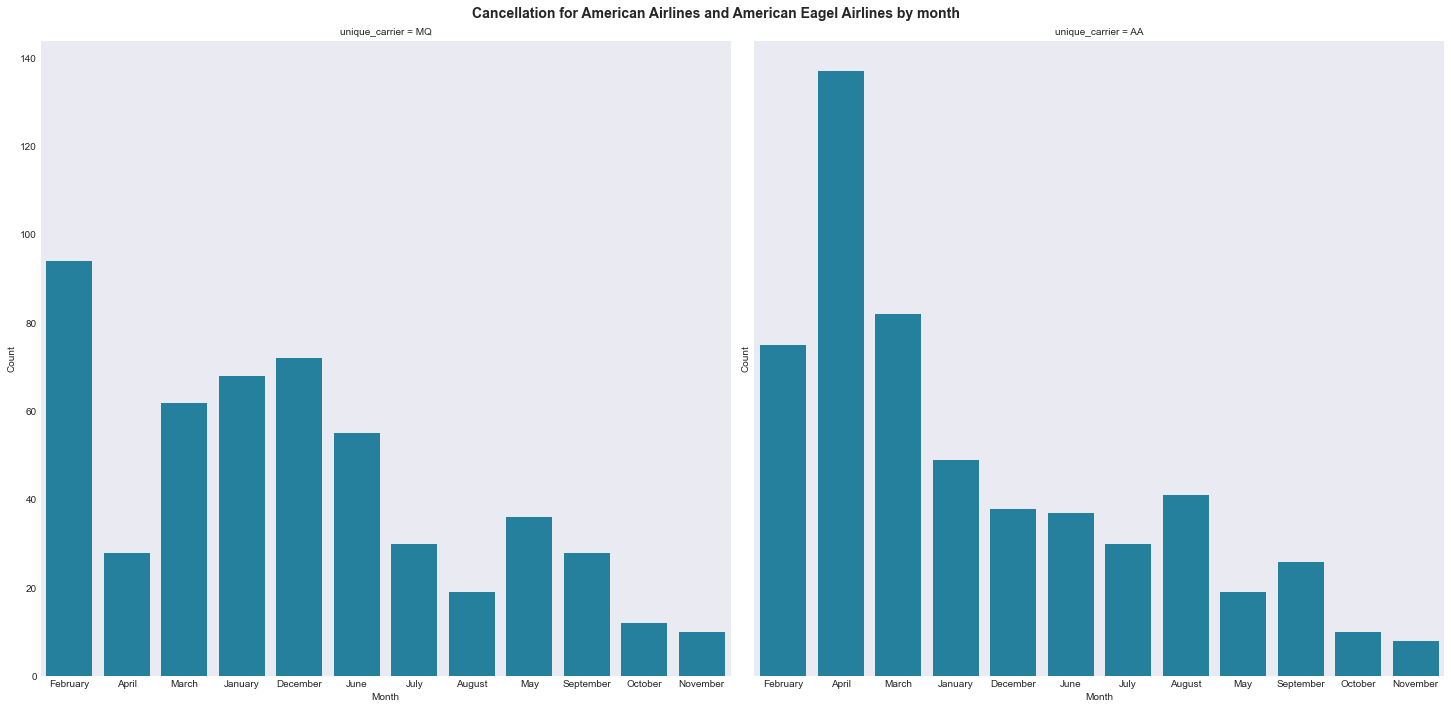

In [50]:
# getting order

order = subset['month_name'].value_counts().index

# plotting

g = sns.FacetGrid(data=subset, col='unique_carrier', col_wrap=5, height=10)
g.map(sns.countplot, 'month_name', order= order)

# axis label and title
g.set(xlabel='Month', ylabel='Count')
plt.suptitle('Cancellation for American Airlines and American Eagel Airlines by month', fontsize = 14, weight = "bold", x=0.20)

plt.tight_layout();
plt.show()

- For American Airlines the more cancellations happened in (April, March, Feburary and January) respectivly.
- For American Eagel Airlines the more cancellations happened in (Feburary, March, Junarary) respectivly. 

### Does the Distance affect  the Arrival Delay for the Carrier ? 

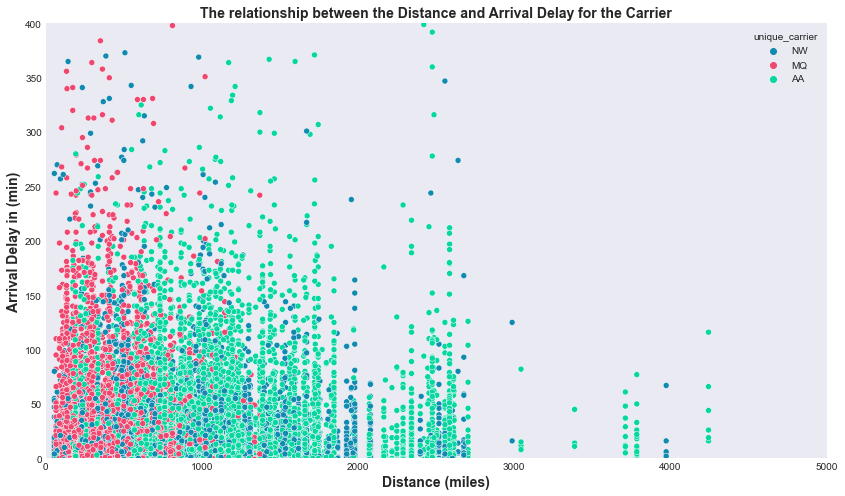

In [52]:
plt.figure(figsize = (14,8))

# plotting the scatter plot
g =sns.scatterplot(data = subset2 ,  x = 'distance', y = 'arrival_delay', hue = 'unique_carrier' )

# putting the x and y lim 
g.set_xlim(0,5000)
g.set_ylim(0, 400)

# #axes labels and title
plt.xlabel('Distance (miles)',fontsize = 14, weight = "bold")
plt.ylabel('Arrival Delay in (min)', fontsize = 14, weight = "bold")
plt.title('The relationship between the Distance and Arrival Delay for the Carrier', fontsize= 14, weight = 'bold')

plt.show()

> More Arrival delay happened in short Distance espcially with `MQ Airlines`

### Delayed flights for American Airlines and American Eagel Airlines per month:

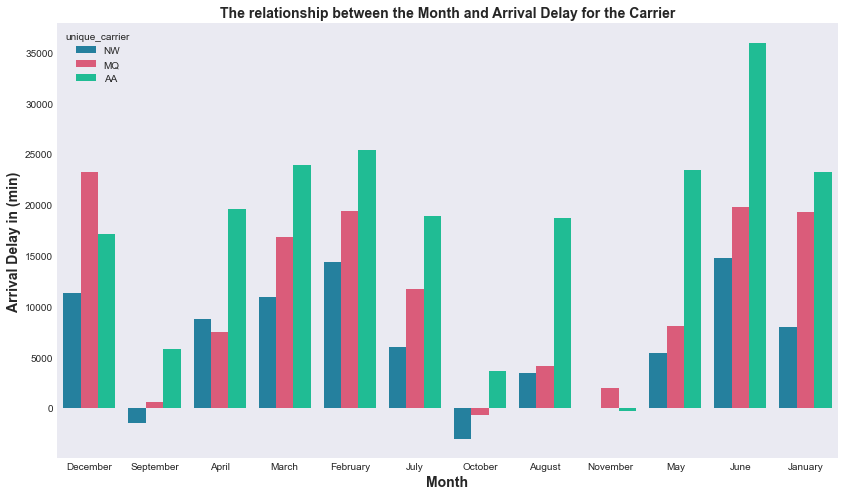

In [53]:
plt.figure(figsize = (14,8))

#plot
sns.barplot(x="month_name", y="arrival_delay", data=subset2, estimator=sum, ci=None,  hue='unique_carrier');

#axes labels and title
plt.xlabel('Month',fontsize = 14, weight = "bold")
plt.ylabel('Arrival Delay in (min)', fontsize = 14, weight = "bold")
plt.title('The relationship between the Month and Arrival Delay for the Carrier', fontsize= 14, weight = 'bold')

plt.show()

> I don't see something special here its almost the same as cancelled fligts.

# Thats it ! 
# I hope you enjoyed it .

In [55]:
!jupyter nbconvert Airlines_Delay_and_Cancellation_Analysis.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Airlines_Delay_and_Cancellation_Analysis.ipynb to slides
[NbConvertApp] Writing 1858866 bytes to Airlines_Delay_and_Cancellation_Analysis.slides.html
